# VII-  Modele de prédiction de la satisfaction du nouveau passager

             1) Construction du classeur K plus proches voisins (KNN)
             
- Dans cette partie on va chercher à prédire après le service, si le client est 'neutral or dissatisfied' (représenté par 0) ou 'satisfied' (représenté par 1).
- Après le nettoyage, on divise notre jeu de données en X_train, Y_train, X_test et Y_test où X_train et X_test sont respectivement les données d’entraînement et les données à classer, Y_train et Y_test sont respectivement les classes des données d’entraînement et des données test.   
- Nos étiquettes sont les niveau de satisfactions ({0,1}).

In [43]:
X_train = df_new.drop('satisfaction', axis = 1)
Y_train = df_new.satisfaction

X_test = df2_clean.drop('satisfaction', axis=1)
Y_test = df2_clean.satisfaction

Afin de minimiser les calculs on décide de normaliser nos donnees avant de les mettre en entrée du **K-NN**:

In [44]:
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

             2) Recherche de la valeur de K avec la meilleur score

- Calcul du score pour 14 valeurs de K ( nombre de plus proches voisins de notre donnée à classer ) K = {1,...,14}
- A la fin on choisira le K qui donne le plus grand score pour entraîner notre classeur.

In [45]:
accuracy = []
for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    accuracy_i = accuracy_score(Y_test, pred_i)
    accuracy.append(accuracy_i)

Représentation graphique du score en fonction des valeurs de **K** (Pour une lecture graphique du meilleur K):

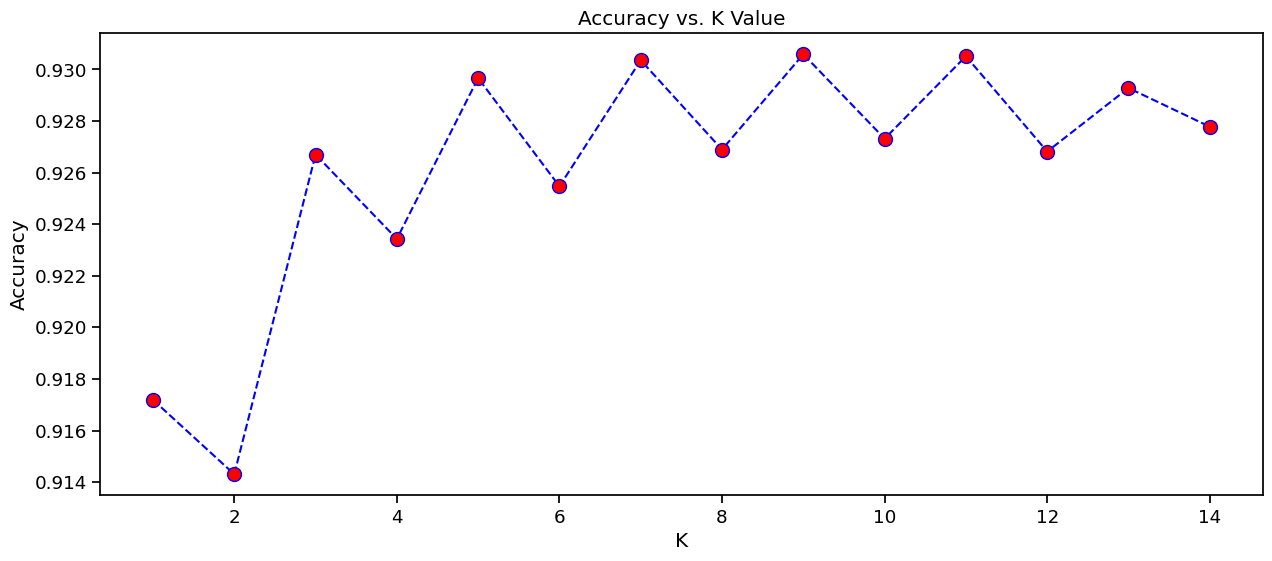

In [46]:
plt.figure(figsize=(15,6))
plt.plot(range(1,15, 1), accuracy, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

Représentation dans un dataframe de la valeur du score pour chaque **K** (Pour une lecture numérique )

In [47]:
Score = pd.DataFrame(accuracy)
Score = Score.rename(lambda x: x+1)
Score

,0
1,0.917193
2,0.914306
3,0.926702
4,0.923429
5,0.929666
6,0.925470
7,0.930359
8,0.926894
9,0.930590
10,0.927318


On remarque que **le score maximal** est atteint pour **K = 9**. Donc on choisira pour la suite d’entraîner notre modèle de prédiction (K-NN) avec **K = 9**.

          Entrainement du modele avec K = 9 et calcul du score de train

In [48]:
KNN = KNeighborsClassifier(n_neighbors= 9)
KNN.fit(X_train, Y_train)
k = KFold(n_splits = 9)
score = cross_val_score(KNN, X_train, Y_train, scoring = 'accuracy', cv = k).mean()
print("Précision sur l'ensemble d'entraînement:", round(score, 9))

Précision sur l'ensemble d'entraînement: 0.929183741


         3) Généralisation du modèle et calcul du score de test

In [49]:
Y_pred = KNN.predict(X_test)
print("Précision sur l'ensemble de test:", round(accuracy_score(Y_test, Y_pred), 9))

Précision sur l'ensemble de test: 0.930589775


         4) Résultats de l'évaluation du K-NN sur l'ensemble de test

In [50]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     14573
           1       0.96      0.88      0.92     11403

    accuracy                           0.93     25976
   macro avg       0.93      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976



- Pour **94%** des données qui ont leur **vrai étiquette égale à 0** ("disssatisfied or neutral") le classeur **prédit leur étiquette 0**.
- Pour **92%** des données qui ont leur **vrai étiquette égale à 1** ("satisfied"), le classeur **prédit leur étiquette 1**
- En moyenne le modèle classe bien les données dans **93%** des cas. Le classeur a donc **7%** de chance de faire une **mauvaise prédiction**.

          5) Matrice de confusion

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

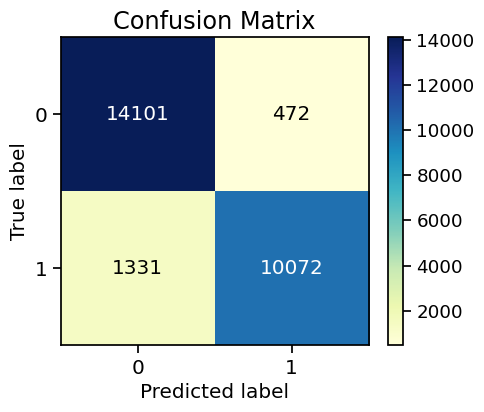

In [51]:
skplt.metrics.plot_confusion_matrix(Y_test, Y_pred, figsize=(5,4), cmap= 'YlGnBu')


       Interprétation de la matrice de confusion
- Parmi les **25976 données de test**, il y a **14101+10072 = 24173 données** qui sont **bien classées** contre **1331+472 = 1803** qui sont **mal classées**. Donc on peut affirmer que notre classeur se généralise plutôt bien à de nouvelles données.
- Pour les données qui ont leur **vraie étiquette égale à '0'**, **14105** d'entre elles sont **bien prédites** contre **468** qui sont **mal prédites**.
- Pour les données qui ont leur **vraie étiquette égale à '1'**, **10065** d'entre elles sont **bien prédites** contre **1338** qui sont **mal prédites**.

Ce qu'on remarque surtout c'est que notre modèle à plus de facilité pour prédire les étiquettes des données dont la vraie étiquette est **'0'**. Ce résultat se justifie par le fait que plus de **56%** des données d’entraînement ont leur étiquette égale à **'0'**.

*voir ci-dessous le code qui fait apparaître la proportion de chaque étiquette dans les données train*.

In [52]:
df_new['satisfaction'].value_counts()/df_new.shape[0]*100

0    56.679058
1    43.320942
Name: satisfaction, dtype: float64

# VIII- Conclusion

*Les avantages du nettoyage des données sont :*
- Amélioration de la qualité des données : Le nettoyage des données élimine les erreurs, les doublons et les données incohérentes, ce qui améliore la qualité des données. Des données de qualité supérieure permettent d'obtenir des résultats plus précis et fiables lors de l'analyse.
- Amélioration de la prise de décision : Des données propres et précises permettent une meilleure prise de décision. Les décideurs peuvent avoir confiance dans les résultats de l'analyse et prendre des décisions éclairées.
- En fin de compte, le nettoyage des données est un élément clé du processus d'analyse de données et contribue à améliorer la qualité des résultats et la prise de décision.

*L’intérêt K-NN c'est qu'il nous sert prédire le niveau de satisfaction des nouveaux passagers. Dans notre cas, on constate qu'il est fiable à 93%. Toutefois il aurait pu être plus performant si les étiquettes des données train étais mieux proportionnées*